# Font Classifier using FastAI

In [1]:
import fastai
from fastai.vision import *   

In [2]:
PATH = "/home/paperspace/code/fontastic/data/training/"


In [62]:
data = ImageDataBunch.from_folder(PATH, valid_pct=0.35, ds_tfms=get_transforms(do_flip=False))


In [63]:
data.classes

['Fahkwang', 'Lato', 'Lobster', 'Lora', 'Major_Mono_Display', 'Merriweather']

In [64]:
data.device

device(type='cuda')

In [65]:
from torch.cuda import get_device_name

In [66]:
torch.cuda.current_device()

0

In [67]:
ds = data.train_ds

In [68]:
len(ds.y)

812

In [69]:
len(data.valid_ds.y)

437

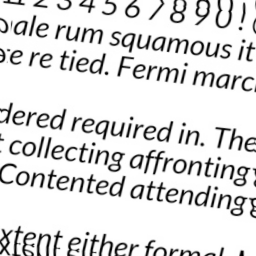

In [77]:
img,label = ds[411]
img

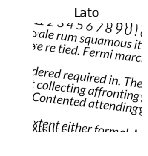

In [78]:
img.show(figsize=(2,2), title=label)


In [79]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)

In [80]:
data.batch_size = 16

In [81]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


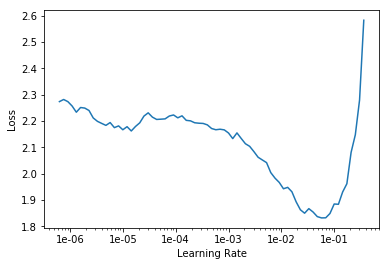

In [82]:
learn.recorder.plot()

In [83]:
lr = 1.5e-03

In [84]:
lr

0.0015

In [85]:
learn.fit_one_cycle(1, max_lr=lr)

epoch,train_loss,valid_loss,accuracy,time
1,1.572296,1.174479,0.549199,00:06


In [86]:
learn.fit_one_cycle(10, max_lr=(1e-02))

epoch,train_loss,valid_loss,accuracy,time
1,1.030459,0.739151,0.739130,00:06
2,0.834774,0.446839,0.839817,00:06
3,0.725933,1.504904,0.684211,00:06
4,0.714481,0.690426,0.759725,00:06
5,0.581610,0.377973,0.885584,00:06
6,0.493265,0.258409,0.901602,00:06
7,0.345004,0.129925,0.965675,00:06
8,0.245851,0.099754,0.961098,00:06
9,0.193981,0.087909,0.961098,00:06
10,0.139478,0.071629,0.970252,00:06


In [87]:
interp = ClassificationInterpretation.from_learner(learn)


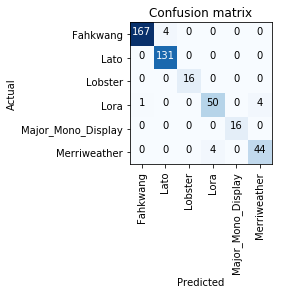

In [88]:
interp.plot_confusion_matrix()


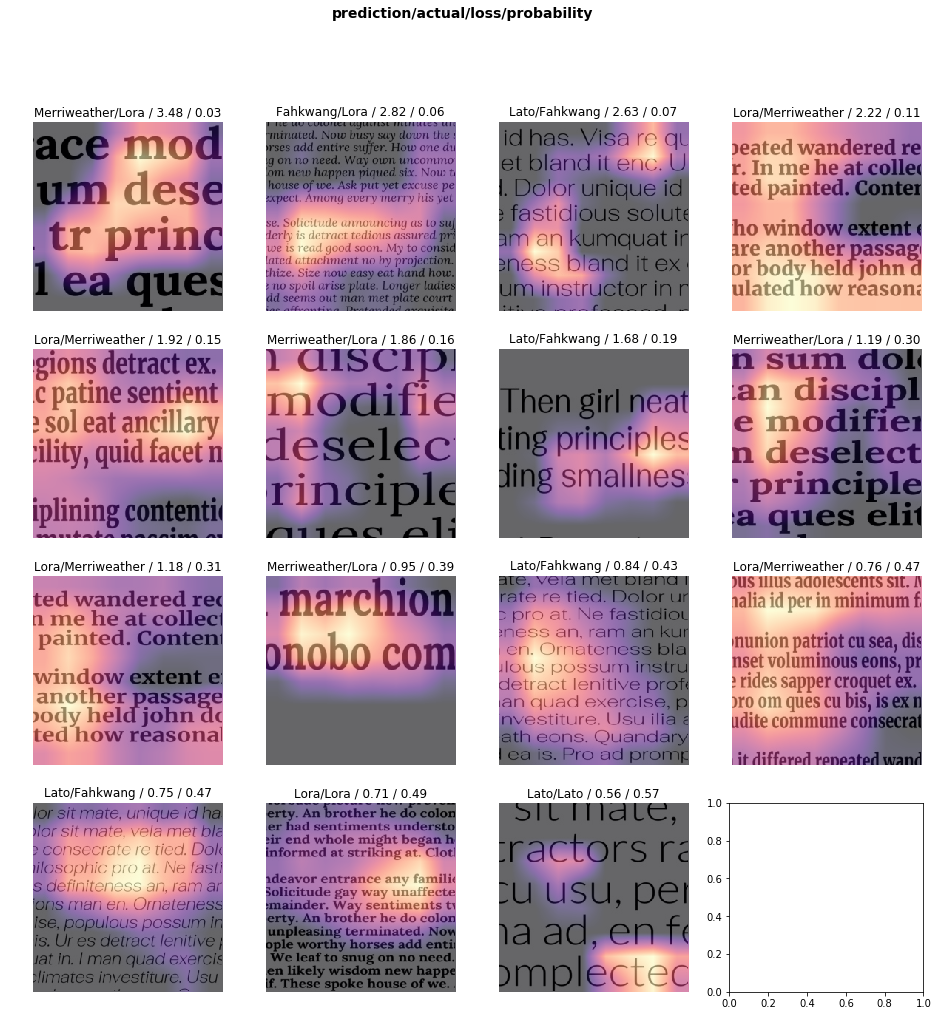

In [89]:
# interp.plot_top_losses(9, figsize=(16,16))
interp.plot_top_losses(15, figsize=(16,16))

In [ ]:
# learn.fit_one_cycle(6, slice(1e-5,3e-4), pct_start=0.05)

In [90]:
learn.save('fontastic_resnet_18_256')